# Data Science – Упражнения для обработки текста


## NLP

### Упражнение 1: Часто встречающиеся слова
Найдите в «Моби Дике» наиболее часто используемые слова, которые не являются стоп-словами и знаками препинания. Подсказка: здесь может пригодиться [`str.isalpha()`](https://docs.python.org/3/library/stdtypes.html#str.isalpha).

In [1]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
from nltk.book import *

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [45]:
# Создаем объект frequency_words, который подсчитывает частоту слов в text1
frequency_words = FreqDist(text1)

# Используем метод most_common, извлекающий 500 самых популярных слов
most_common = frequency_words.most_common(500)

# Отфильтруем слова, оставляя только нужные
top_words = [word_tuple for word_tuple in most_common if word_tuple[0].lower() not in stopwords]
top_words = [word_tuple for word_tuple in top_words if word_tuple[0].isalpha()]

# Выведим топ 25 самых популярных слов
top_words[0:25]

[('whale', 906),
 ('one', 889),
 ('like', 624),
 ('upon', 538),
 ('man', 508),
 ('ship', 507),
 ('Ahab', 501),
 ('ye', 460),
 ('old', 436),
 ('sea', 433),
 ('would', 421),
 ('head', 335),
 ('though', 335),
 ('boat', 330),
 ('time', 324),
 ('long', 318),
 ('said', 302),
 ('yet', 300),
 ('still', 299),
 ('great', 293),
 ('two', 285),
 ('seemed', 283),
 ('must', 282),
 ('Whale', 282),
 ('last', 277)]

In [49]:
# Создадим датафрейм с самыми популярными словами
import pandas as pd
df = pd.DataFrame(top_words[0:25])
df.columns = ['Word', 'Frequency']
df

,Word,Frequency
0,whale,906
1,one,889
2,like,624
3,upon,538
4,man,508
5,ship,507
6,Ahab,501
7,ye,460
8,old,436
9,sea,433


In [50]:
# Проверим тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       25 non-null     object
 1   Frequency  25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


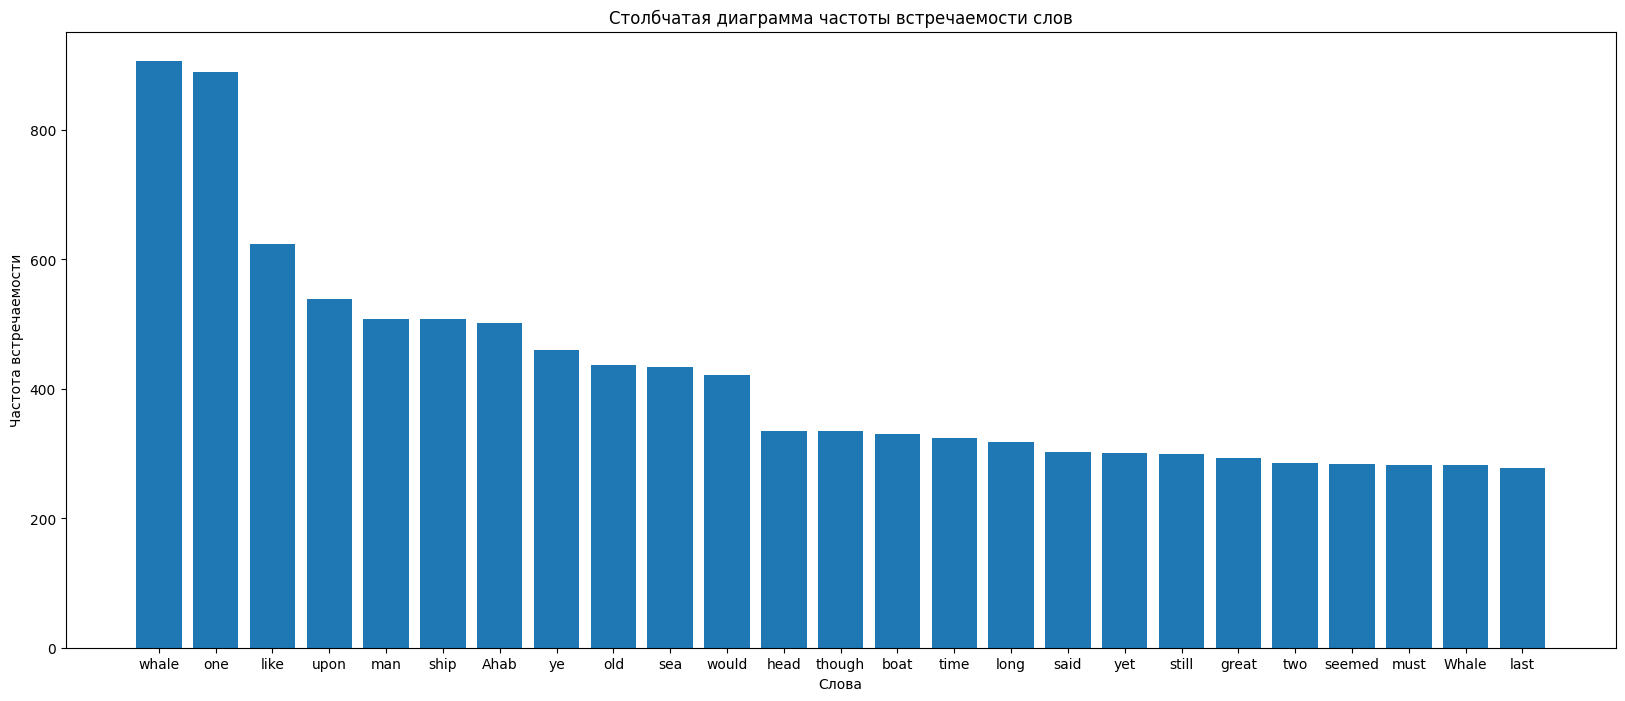

In [51]:
# Построим столбчатую диаграмму
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.bar(df['Word'], df['Frequency'])
plt.xlabel('Слова')
plt.ylabel('Частота встречаемости')
plt.title('Столбчатая диаграмма частоты встречаемости слов')
plt.show()

## Упражнение 2

Вы злой спамер, который заметил, что многие люди пытаются запутать свою электронную почту, используя пометку: «alex at utah dot edu». Ниже приведены три примера текста таких писем. Попробуйте извлечь «alex at utah dot edu» и т. д. Начните с первой строки. Затем расширьте свое регулярное выражение, чтобы оно работало со всеми ними одновременно. Обратите внимание, что второе и третье сделать намного сложнее!

You're an evil Spammer who's observed that many people try to obfuscate their e-mail using this notation: "`alex at utah dot edu`". Below are three examples of such e-mails text. Try to extract "alex at utah dot edu", etc. Start with the first string. Then extend your regular expression to work on all of them at the same time. Note that the second and third are slightly harder to do!

In [3]:
import re
html_smart = "You can reach me: alex at utah dot edu"
html_smart2 = "You can reach me: alex dot lex at utah dot edu"
html_smart3 = "You can reach me: alex dot lex at sci dot utah dot edu"

In [4]:
def testRegex(regex):
    for html in (html_smart, html_smart2, html_smart3):
        print(re.search(regex, html).group())

## Упражнение 2.2: Найдите наречия

Напишите регулярное выражение, которое находит все наречия в предложении. Наречия характеризуются окончанием на «ly».

In [7]:
text = "He was carefully disguised but captured quickly by police."

In [8]:
re.findall(r"\w+ly", text)

['carefully', 'quickly']

### Упражнение 2.3: Телефонные номера

Извлеките из текста номера телефонов, которые следуют шаблону (xxx) xxx-xxxx:

In [9]:
phone_numbers = "(857) 131-2235, (801) 134-2215, but this one (12) 13044441 shouldnt match. Also, this is common in twelve (12) countries and one (1) state"

In [10]:
re.findall(r"\([0-9]{3}\)\s[0-9]{3}-[0-9]{4}", phone_numbers)

['(857) 131-2235', '(801) 134-2215']

### Упражнение 2.4. HTML-контент

Извлеките содержимое между тегами `<b>` и `<i>`, но не другими тегами:

In [11]:
html_tags = "This is <b>important</b> and <u>very</u><i>timely</i>"

In [12]:
re.findall(r"<[bi]>(.*?)<\/[bi]>", html_tags)

['important', 'timely']